In [9]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

data = pd.read_csv("/content/creditcard.csv")
data.head(7)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0


In [10]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(227811, 31)
               Time             V1             V2             V3  \
count  227811.00000  227811.000000  227811.000000  227811.000000   
mean    79032.91597      -0.067252      -0.013595       0.182659   
std     39500.61246       1.943547       1.658015       1.490414   
min         0.00000     -56.407510     -72.715728     -33.680984   
25%     47688.00000      -0.948956      -0.601276      -0.570257   
50%     73256.00000      -0.034778       0.067681       0.371774   
75%    120383.50000       1.241139       0.781112       1.153350   
max    145231.00000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  227811.000000  227811.000000  227811.000000  227811.000000   
mean        0.043798      -0.063845       0.030504      -0.026888   
std         1.411267       1.373093       1.321318       1.228287   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.825410      -0.

In [11]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0018338295374088034
Fraud Cases: 417
Valid Transactions: 227393


In [13]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,417.000000
mean,125.656379
std,256.880976
min,0.000000
25%,1.000000
50%,12.310000
75%,106.900000
max,2125.870000


In [14]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,227393.000000
mean,90.768591
std,250.504241
min,0.000000
25%,6.000000
50%,23.420000
75%,79.970000
max,19656.530000


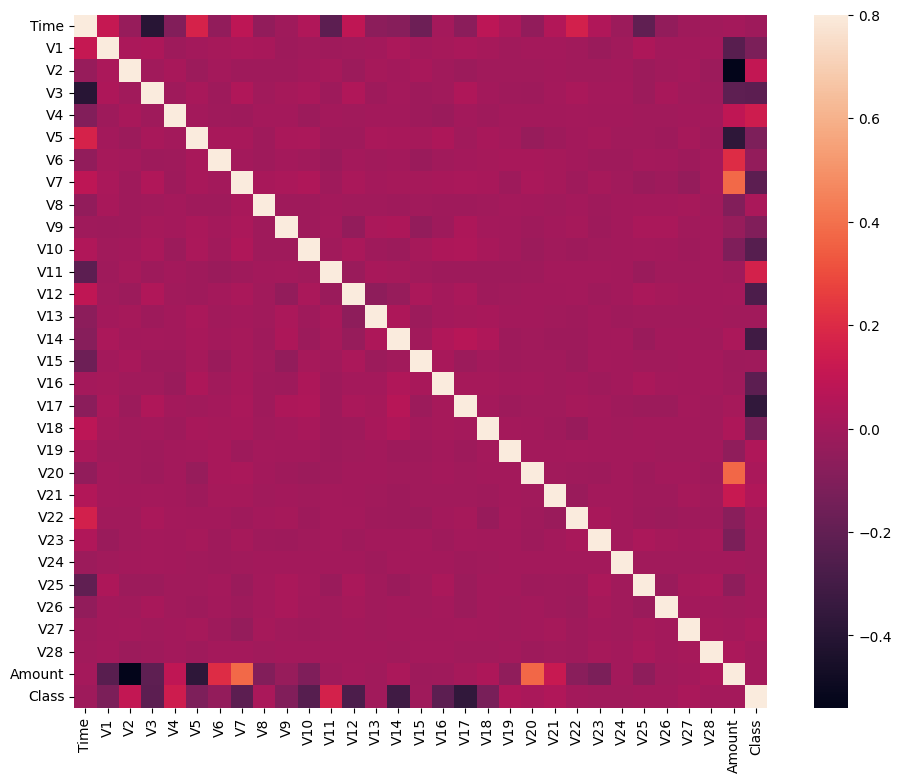

In [15]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(227811, 30)
(227811,)


In [17]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [20]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# Instead of SimpleImputer, use the 'most_frequent' strategy:
from sklearn.impute import SimpleImputer


# Create an imputer to replace NaN values with the most frequent value for classification
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data and transform both training and testing data
yTrain_imputed = imputer.fit_transform(yTrain.reshape(-1, 1))
yTrain_imputed = yTrain_imputed.ravel() # Reshape back to original shape


# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain_imputed) # Use imputed yTrain for training
# predictions
yPred = rfc.predict(xTest)

In [21]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995829949739921
The precision is 0.9473684210526315
The recall is 0.8275862068965517
The F1-Score is 0.8834355828220859
The Matthews correlation coefficient is0.8852529748251899


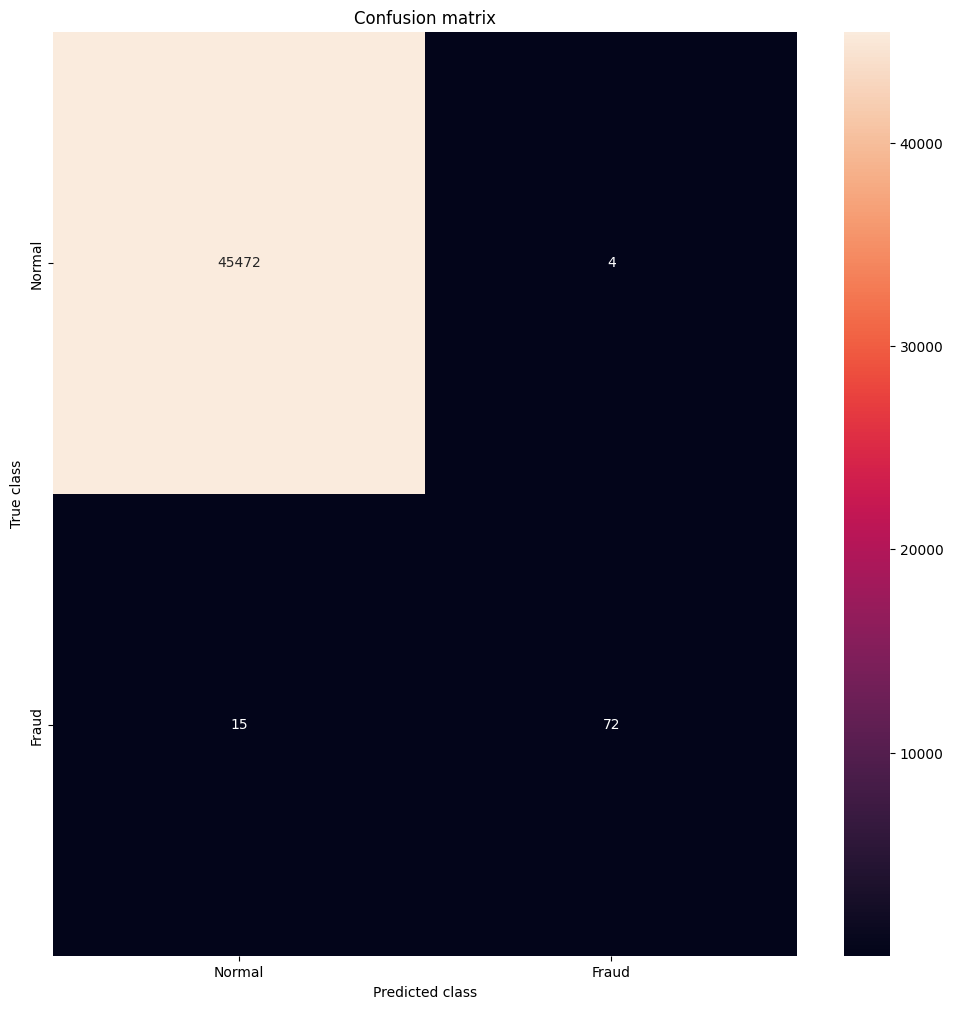

In [22]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()